<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/me/est_tarefa_aula06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Métodos Estatísticos - 2021/2**

* **Exercícios - Aula 06**
* **Prof.: Diego Barreto Haddad**
* **Aluno: Janio de Souza Lima**



---

In [134]:
#Carga de bibliotecas usadas nas questões
import numpy as np
from matplotlib import pyplot as plt

In [142]:
#Definindo uma semente para reprodutibilidade dos aleatórios
np.random.seed(31)

In [143]:
def padrao(X, mu, sigma):
  #Função de transformação para normal padrão
  Z = (X-mu)/sigma
  return Z

Distribuição gaussiana

## Questão 1:

Seja uma variável aleatória gaussiana $X$ com média e desvio padrão unitários.

In [144]:
mu = 1.0 #Média
sigma = 1.0 #Desvio padrão

### a) Apelando à Tabela A.3, calcule $Prob\{X \leq 1\}$

Transformação do valor $X=1$ para uma distribuição normal padrão, com $\mu=0$ e $sigma = 1$.

In [145]:
X = 1
Z = padrao(X, mu, sigma)
Z

0.0

Pela tabela A.3 [Walpole et al., 2012] para $Z=0$ a probabilidade é $0.5$, ou seja, considerando que a distribuição é centrada na média igual a 0, a $Prob\{Z \leq 0\} = 0.5$, então para a distribuição gaussiana com $\mu = 1$ e $\sigma=1$, a $Prob\{X \leq 1 \} \approx 0.5$.

### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

Geração de valores aleatórios para a distribuição solicitada.

In [150]:
N = 1000000 #Quantidade de números aleatórios
x = np.random.normal(mu, sigma, size=N) #Geração dos números aleatórios

Visualização do histograma e da densidade de probabilidade dos números aleatórios gerados originalmente.

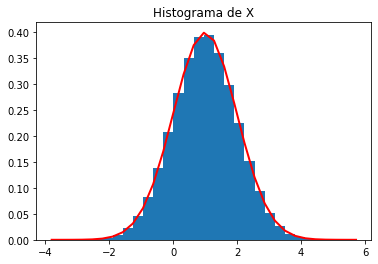

In [151]:
#Histograma
plt.title('Histograma de X')
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

Cálculo da proporção de observações no intervalo desejado (baseado nos valores aleatórios originais):

In [152]:
#Quantidade de valores de x abaixo de 1
obsIntervalo = len(x[x<=X])
obsIntervalo

501208

In [153]:
probX = obsIntervalo/N
probX

0.501208

Pelos cálculos realizados chegamos a conclusão que $Prob\{X \leq 1\} \approx = 0.5$.

Visualização do histograma e da densidade de probabilidade dos números aleatórios transformados para uma distribuição normal padrão.

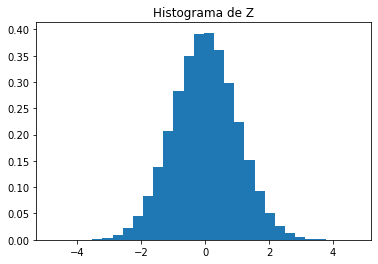

In [154]:
#Transformação de x em uma normal padrão
#z = (x-mu)/sigma
z = padrao(x, mu, sigma)

#Histograma da variável transformada
plt.title('Histograma de Z')
count, bins, ignored = plt.hist(z, 30, density=True)

Cálculo da proporção de observações no intervalo desejado (baseado nos valores transformados para normal padrão):

In [116]:
#Quantidade de valores de z abaixo de 0
obsIntervalo = len(z[z<=Z])
obsIntervalo

500182

In [117]:
probZ = obsIntervalo/N
probZ

0.500182

## Questão 2:

Seja uma variável aleatória gaussiana $X$ com média e desvio padrão unitários.

### a) Apelando à Tabela A.3, calcule $Prob\{-2 \leq X \leq 0.5\}$

In [155]:
#Definição dos limites de acordo com o enunciado
li = -2  #Limite inferior
ls = 0.5 #Limite superior

In [156]:
liZ = padrao(li, mu, sigma)
lsZ = padrao(ls, mu, sigma)
print(liZ, lsZ)

-3.0 -0.5


### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

Para resolução da questão através de ensaios de Monte Carlo, reaproveitaremos os valores aleatórios já gerados na questão 1, tendo em vista que a distribuição possui os mesmos valores de $\mu = 1$ e $\sigma = 1$. Desta forma, atualizaremos os cálculos apenas para verificar o intervalo solicitado para $Prob\{-2 \leq X \leq 0.5\}$.

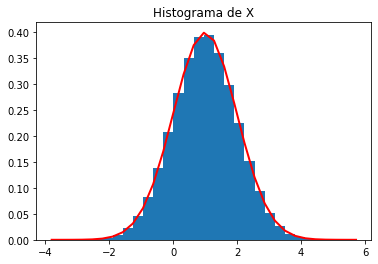

In [157]:
#Histograma
plt.title('Histograma de X')
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

Inicialmente calcularemos todos os valores que estarão no espaço sob a curva a partir do ponto -2

In [158]:
#Quantidade de valores de x acima de -2
len(x[x>=li])

998604

O valor obtido, indica que das $1000000$ observações $998708$ estão a partir de -2. Portanto, para obter o valor no intervalo desejado, vamos verificar os valores que estão acima do limite superior $0.5$.

In [159]:
#Quantidade de valores de x acima de 0.5
len(x[x>=ls])

690868

Verificamos que $690947$ observações estão a partir do valor $0.5$. Com estes dados, para descobrirmos os valores no intervalo $[-2,0.5]$, considerando que as observações de $X\geq-2$ contém as observações de $X \leq 0.5$, basta excluirmos os valores que estejam acima deste intervalo que o que sobrará serão exatamente os valores que atendem ao enunciao $-2 \leq X \leq 0.5$.

In [160]:
#Quantidade de valores de x acima de -2 e abaixo de 0.5
obsIntervalo = len(x[x>=li]) - len(x[x>=ls])
obsIntervalo

307736

In [161]:
probX = obsIntervalo/N
probX

0.307736

Aplicando a lógica descrita anteriormente, encontramos $307761$, assim chegamos a conclusão que $Prob\{-2\leq X \leq0.5\} \approx 0.3078$.

## Questão 3:

Seja uma variável aleatória gaussiana $X$ com média $\mu = 50$ e desvio padrão $\sigma = 5$.

In [162]:
N = 1000000 #Quantidade de números aleatórios
mu = 50 #Média
sigma = 5 #Desvio padrão

In [163]:
x = np.random.normal(mu, sigma, size=N)

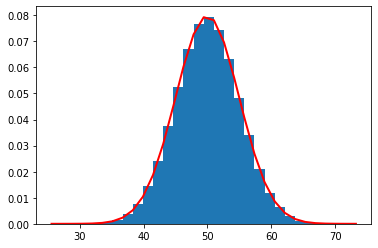

In [164]:
#Histograma
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

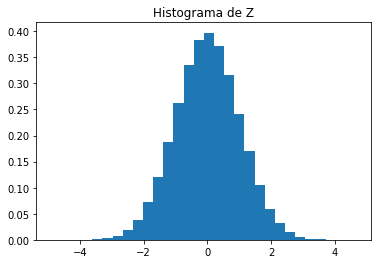

In [165]:
#Transformação de x em uma normal padrão
z = padrao(x, mu, sigma)

#Histograma da variável transformada
plt.title('Histograma de Z')
count, bins, ignored = plt.hist(z, 30, density=True)

### a) Apelando à Tabela A.3, calcule $Prob\{X \leq 51\}$

Transformação do valor $51$.

In [166]:
Z = padrao(51, mu, sigma)
Z

0.2

Pela aplicação da tabela A.3, para o valor de $z=0.2$ obtemos o valor da área sob a curva normal de $0.5793$.

### b) Desenvolver programa para responder a questão usando ensaios de Monte Carlo

In [128]:
X = 51

In [129]:
#Quantidade de valores de x abaixo de 1
obsIntervalo = len(x[x<=X])
obsIntervalo

578722

In [130]:
probX = obsIntervalo/N
probX

0.578722

Testando os valores transformando a distribuição para uma normal padrão.

In [131]:
Z = (X-mu)/sigma
Z

0.2

In [132]:
#Quantidade de valores de x abaixo de 1
obsIntervalo = len(z[z<=Z])
obsIntervalo

578722

In [133]:
probZ = obsIntervalo/N
probZ

0.578722

Pelos cálculos com ensaios de Monte Carlo chegamos a conclusão que $Prob\{X \leq 51\} \approx = 0.5787$.

## Questão 4:

Seja uma variável aleatória gaussiana $X$ com média $\mu = -10$ e desvio padrão $\sigma = 2$.

In [46]:
N = 1000000 #Quantidade de números aleatórios
mu = -10 #Média
sigma = 2 #Desvio padrão

In [47]:
x = np.random.normal(mu, sigma, size=N)

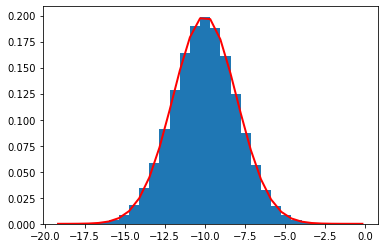

In [48]:
#Histograma
count, bins, ignored = plt.hist(x, 30, density=True)

#Função densidade de probabilidade
plt.plot(bins, 1/(sigma * np.sqrt(2* np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')

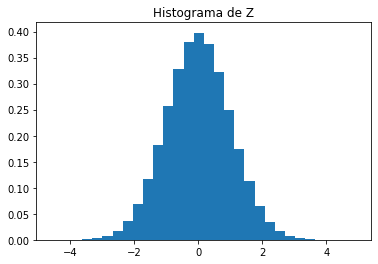

In [49]:
#Transformação de x em uma normal padrão
z = (x-mu)/sigma

#Histograma da variável transformada
plt.title('Histograma de Z')
count, bins, ignored = plt.hist(z, 30, density=True)

## Questão 5:

Uma distribuição binomial $X$ apresenta $n=100$. Qual a probabilidade de observarmos $r$ sucessos, com $50 \leq r \leq 60$, para diferentes valores de probabilidade de sucesso $p$?

#Referências

Ronald E. Walpole, Raymond H. Myers, Sharon L. Myers e Keying Ye. **Probability & Statistics for Engineers & Scientistis**. Pearson, 2012.